---
# Fixed Income Quantitative Trading
Haritha GB

hg2590@nyu.edu

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [268]:
plt.style.use('ggplot')

In [269]:
full_data = pd.read_csv("yield-curve-rates-2004-2023.csv", skiprows = 1)
full_data = full_data.set_index('Date')

full_data.index = pd.to_datetime(full_data.index)  # Ensure index is in datetime format
full_data = full_data.sort_index() # sort index

In [270]:
type(full_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [271]:
estimation_start_date = "2012-01-01"
estimation_end_date = "2017-01-01"

signalbuilding_start_date = "2017-01-01"
signalbuilding_end_date = "2019-01-01"

testing_start_date = "2019-01-01"
testing_end_date = "2020-01-01"

Creating three separate datasets: one for estimation, another for signal_building and last for testing

In [272]:
estimation_df = full_data[(full_data.index >= estimation_start_date) & (full_data.index <= estimation_end_date)]

In [273]:
signal_building = full_data[(full_data.index >= signalbuilding_start_date) & (full_data.index < signalbuilding_end_date)]

In [274]:
testing = full_data[(full_data.index >= testing_start_date) & (full_data.index < testing_end_date)]

In [275]:
import statsmodels.api as sm

In [276]:
# I have used the Box-Tiao method to find weights for the spread.

def cca_box_tiao(df):
  # first we need to center the dataframe
  df = df - df.mean()

  # then we generate a lagged dataset
  df_lag = df.shift().dropna()

  # create an aligned dataset after the shift
  df_aligned = df.loc[df_lag.index, :]

  model = sm.OLS(df_aligned.values, df_lag.values).fit()

  # return the parameter matrix
  A = model.params

  # find df_aligned's cov matrix
  cov = df_aligned.cov()


  # measure of relative predictability
  Q = (np.linalg.inv(cov)) @ (np.transpose(A)) @ (cov) @ (A)

  values, vectors = np.linalg.eig(Q)

  return values, vectors

In [277]:
pairs = [("2 Yr", "3 Yr"), ("3 Yr","5 Yr"),("7 Yr","10 Yr"),("5 Yr", "7 Yr")] # defining pairs in question for ease of use

# Question 1: Cointegrated Spreads of CMT Rates

---
2Yr-3Yr

In [278]:
values, vectors = cca_box_tiao(estimation_df[["2 Yr", "3 Yr"]])
s1 = vectors[:, 0]
s1 = [s1[0]/s1[1], s1[1]/s1[1]] # I divide by 1 since the question mentioned that the long weight must be 1

The 2Yr and 3Yr cointegrated spread is: [-4.1831218101266465, 1.0]


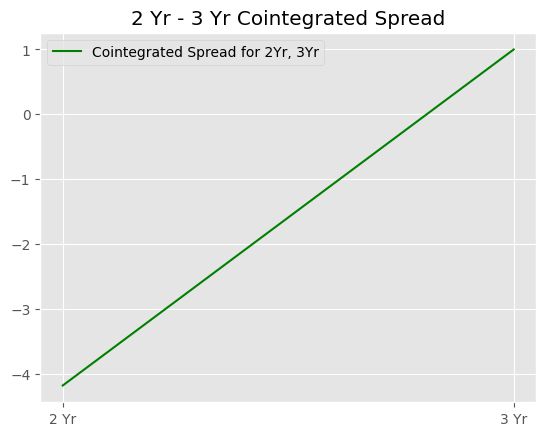

In [279]:
print("The 2Yr and 3Yr cointegrated spread is:", s1)
plt.plot(["2 Yr", "3 Yr"], s1, label = "Cointegrated Spread for 2Yr, 3Yr", color = 'green')
plt.style.use('ggplot')
plt.title("2 Yr - 3 Yr Cointegrated Spread")
plt.legend()
plt.show()

---
3Yr- 5Yr

In [280]:
values, vectors = cca_box_tiao(estimation_df[["3 Yr","5 Yr"]])
s2 = vectors[:, 0]
s2 = [s2[0]/s2[1], s2[1]/s2[1]]

The 3Yr and 5Yr cointegrated spread is: [-1.5806148343998578, 1.0]


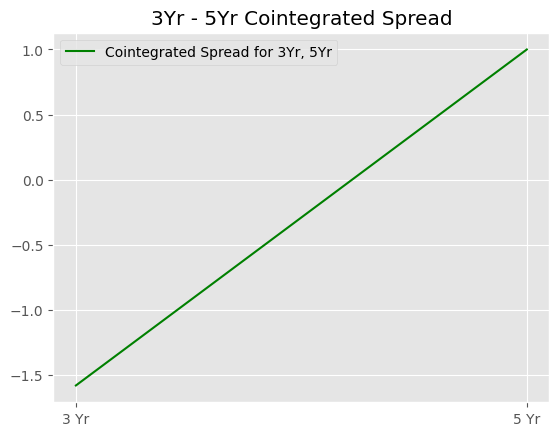

In [281]:
print("The 3Yr and 5Yr cointegrated spread is:", s2)
plt.plot(["3 Yr", "5 Yr"], s2, label = "Cointegrated Spread for 3Yr, 5Yr", color = 'green')
plt.style.use('ggplot')
plt.title("3Yr - 5Yr Cointegrated Spread")
plt.legend()
plt.show()

---
7Yr-10Yr

In [282]:
values, vectors = cca_box_tiao(estimation_df[["7 Yr", "10 Yr"]])
s3 = vectors[:, 0]


In [283]:
s3 = [s3[0]/s3[1], s3[1]/s3[1]]
s3

[-0.9932642935369848, 1.0]

The 7Yr and 10Yr cointegrated spread is: [-0.9932642935369848, 1.0]


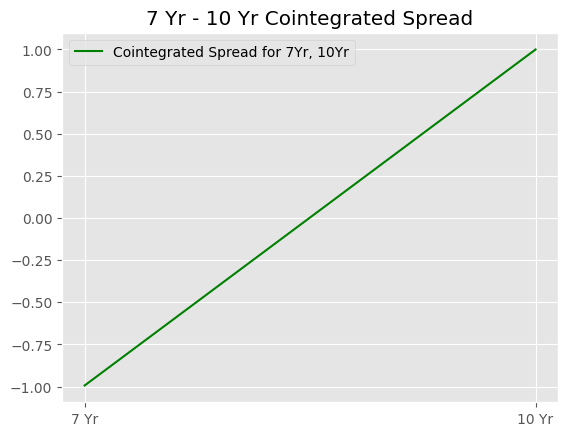

In [284]:
print("The 7Yr and 10Yr cointegrated spread is:", s3)
plt.plot(["7 Yr", "10 Yr"], s3, label = "Cointegrated Spread for 7Yr, 10Yr", color = 'green')
plt.style.use('ggplot')
plt.title("7 Yr - 10 Yr Cointegrated Spread")
plt.legend()
plt.show()

---
5Yr-7Yr

In [285]:
values, vectors = cca_box_tiao(estimation_df[["5 Yr", "7 Yr"]])
s4 = vectors[:, 0]
s4 = [s4[0]/s4[1], s4[1]/s4[1]]

The 5Yr and 7Yr cointegrated spread is: [-1.2679908611663069, 1.0]


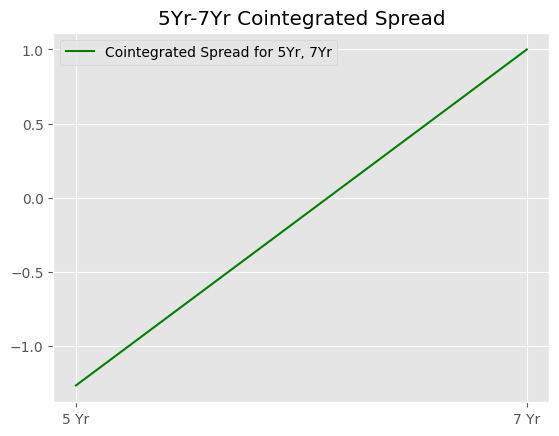

In [286]:
print("The 5Yr and 7Yr cointegrated spread is:", s4)
plt.plot(["5 Yr", "7 Yr"], s4, label = "Cointegrated Spread for 5Yr, 7Yr", color = 'green')
plt.style.use('ggplot')
plt.title("5Yr-7Yr Cointegrated Spread")
plt.legend()
plt.show()

---
# Question 2

In [287]:
# first calculating spread series for sample A
def spread_series(df, weights):
    """ Calculate weighted spread series. """
    spread = df @ weights
    label = f"{df.columns[0]}-{df.columns[1]}"
    plt.plot(spread, label=label)
    plt.legend()
    plt.title("Spread Series")
    plt.show()
    return spread

In [288]:
pairs = [("2 Yr", "3 Yr"), ("3 Yr", "5 Yr"), ("7 Yr", "10 Yr"), ("5 Yr", "7 Yr")]
weights = pd.DataFrame([s1, s2, s3, s4], columns=["W1", "W2"])  # Using weights from Q1

In [289]:
weights

,W1,W2
0,-4.183122,1.0
1,-1.580615,1.0
2,-0.993264,1.0
3,-1.267991,1.0


Processing 2 Yr-3 Yr...


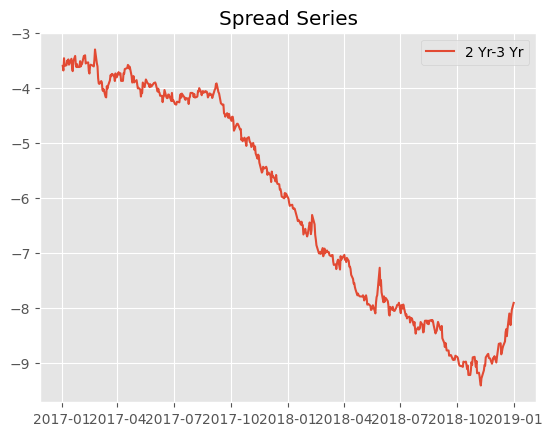

Processing 3 Yr-5 Yr...


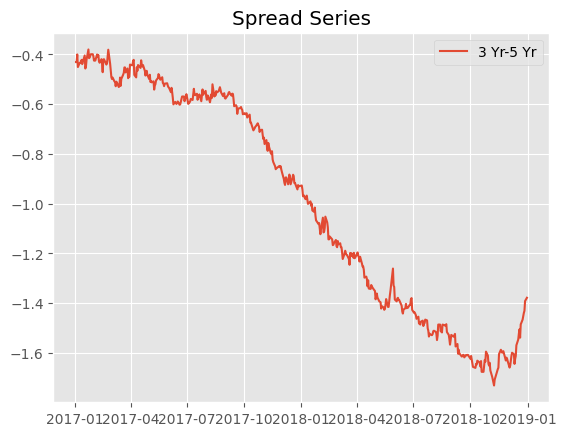

Processing 7 Yr-10 Yr...


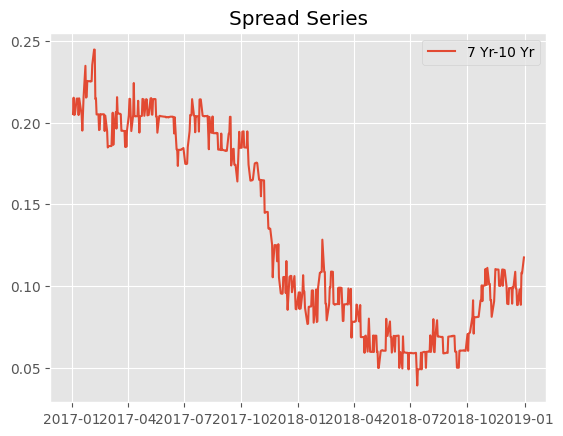

Processing 5 Yr-7 Yr...


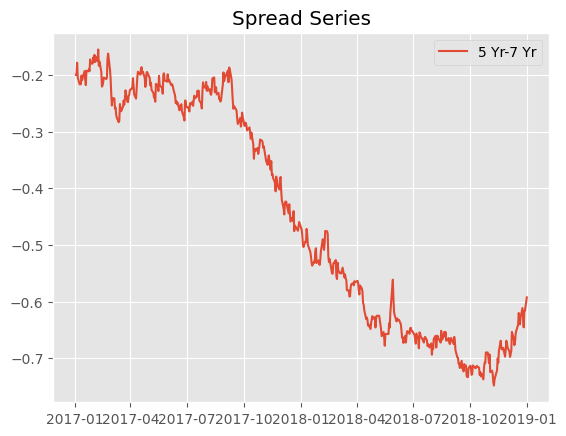

In [290]:
# now I'll generate the same for the main parts of this questions, which is for sample b
spreads_signalset = pd.DataFrame()

for x, (s, l) in enumerate(pairs):
    col = f"{s}-{l}"
    print(f"Processing {col}...")
    # print(signal_building[[s, l]].head())
    series = spread_series(signal_building[[s, l]], weights.iloc[x].values)
    spreads_signalset[col] = series

In [291]:
# EMA Function
def calculate_ema(vals, lda):
    """ Calculate Exponential Moving Average. """
    if lda == 0:
        return vals.expanding().mean()  # Simple Moving Average for lda=0
    return vals.ewm(alpha=lda, adjust=False).mean()

In [292]:
spreads_signalset

,2 Yr-3 Yr,3 Yr-5 Yr,7 Yr-10 Yr,5 Yr-7 Yr
Date,,,,
2017-01-03,-3.603409,-0.430922,0.205223,-0.199902
2017-01-04,-3.687071,-0.430922,0.215223,-0.199902
2017-01-05,-3.464253,-0.400279,0.204684,-0.178463
2017-01-06,-3.603409,-0.450922,0.205021,-0.204542
2017-01-09,-3.591577,-0.433504,0.214684,-0.216503
...,...,...,...,...
2018-12-24,-8.106961,-1.466374,0.097917,-0.611416
2018-12-26,-8.317948,-1.439599,0.088456,-0.645536
2018-12-27,-8.158792,-1.430568,0.108052,-0.616776


In [293]:
df_dict = {}

In [294]:
# Loop through each spread column and calculate EMAs
for col in spreads_signalset.columns:
    # Create a new DataFrame for the current spread
    df = pd.DataFrame()
    df['Spread'] = spreads_signalset[col]  # Add the original spread column

    # Calculate EMAs for different lambda values
    for lda in [0, 0.05, 0.1]:
        ema_col_name = f"EMA_{lda}"
        df[ema_col_name] = calculate_ema(spreads_signalset[col], lda)

    # Add the resulting DataFrame to the dictionary
    df_dict[col] = df

In [295]:
# Checking: Access the DataFrame for the "2 Yr-3 Yr" spread
print("2 Yr-3 Yr Spread and EMAs:")
print(df_dict["2 Yr-3 Yr"].head())

# Checking: Access a specific EMA column
print("\nEMA with lambda=0.05 for 2 Yr-3 Yr:")
print(df_dict["2 Yr-3 Yr"]['EMA_0.05'].head())

2 Yr-3 Yr Spread and EMAs:
              Spread     EMA_0  EMA_0.05   EMA_0.1
Date                                              
2017-01-03 -3.603409 -3.603409 -3.603409 -3.603409
2017-01-04 -3.687071 -3.645240 -3.607592 -3.611775
2017-01-05 -3.464253 -3.584911 -3.600425 -3.597023
2017-01-06 -3.603409 -3.589535 -3.600574 -3.597661
2017-01-09 -3.591577 -3.589944 -3.600124 -3.597053

EMA with lambda=0.05 for 2 Yr-3 Yr:
Date
2017-01-03   -3.603409
2017-01-04   -3.607592
2017-01-05   -3.600425
2017-01-06   -3.600574
2017-01-09   -3.600124
Name: EMA_0.05, dtype: float64


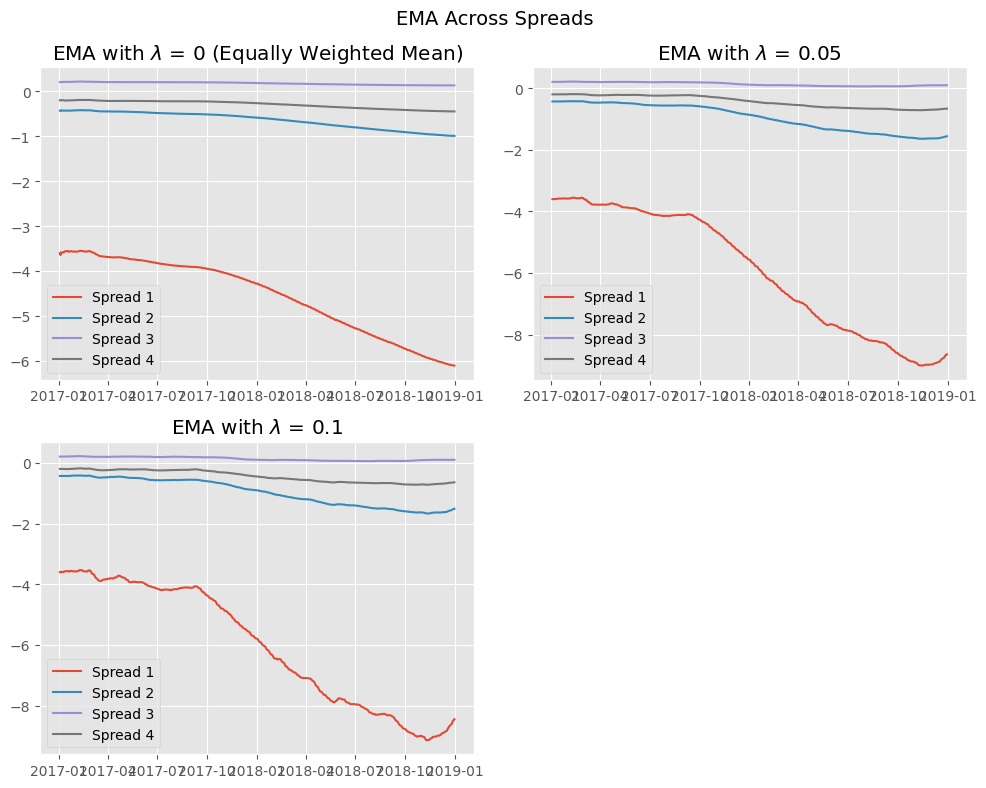

In [296]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

# Define lambda values and subplot titles
lambda_values = [0, 0.05, 0.1]
titles = [
    "EMA with $\lambda$ = 0 (Equally Weighted Mean)",
    "EMA with $\lambda$ = 0.05",
    "EMA with $\lambda$ = 0.1"
]

# Loop through lambda values and subplots
for idx, lda in enumerate(lambda_values):
    row, col = divmod(idx, 2)  # Calculate row and column for subplot grid
    ax = axs[row, col]

    # Plot EMAs for each spread
    for spread_idx, spread_name in enumerate(df_dict.keys()):
        ax.plot(df_dict[spread_name][f"EMA_{lda}"], label=f"Spread {spread_idx+1}")

    ax.legend()
    ax.set_title(titles[idx])

# Remove the last subplot (bottom right) since it's unused
axs[1, 1].axis('off')

# Add a global title
fig.suptitle("EMA Across Spreads", fontsize=14)
plt.show()


In [297]:
# Calculate Residuals for Each Spread and Lambda
for spread_name, df in df_dict.items():
    for lda in [0, 0.05, 0.1]:
        # Calculate residual and store as a new column
        df[f'Resid_{lda}'] = df['Spread'] - df[f'EMA_{lda}']

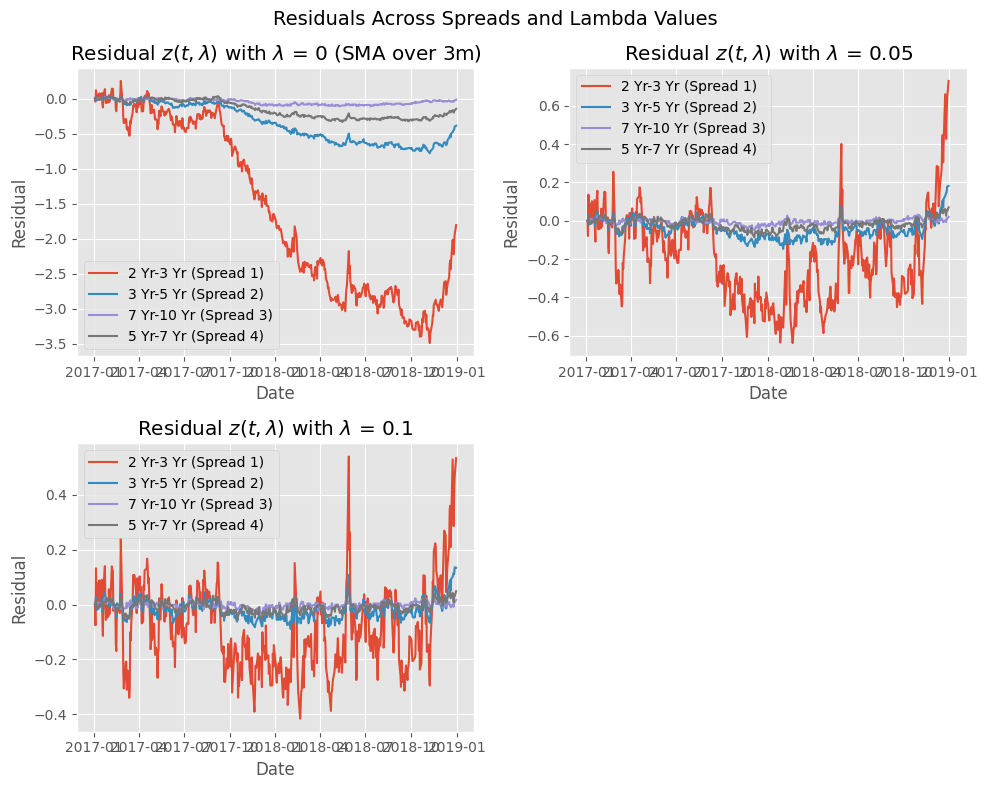

In [298]:
# Define lambda values and corresponding titles
lambda_values = [0, 0.05, 0.1]
titles = [
    r"Residual $z(t, \lambda)$ with $\lambda$ = 0 (SMA over 3m)",
    r"Residual $z(t, \lambda)$ with $\lambda$ = 0.05",
    r"Residual $z(t, \lambda)$ with $\lambda$ = 0.1"
]

# Initialize the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

for idx, lda in enumerate(lambda_values):
    row, col = divmod(idx, 2)  # Determine subplot row and column
    ax = axs[row, col]  # Access the correct subplot

    # Loop over spreads in df_dict and plot their residuals
    for spread_idx, (spread_name, df) in enumerate(df_dict.items()):
        ax.plot(df[f'Resid_{lda}'], label=f"{spread_name} (Spread {spread_idx+1})")

    ax.set_title(titles[idx])
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Residual")

# Turn off the unused bottom-right subplot
axs[1, 1].axis('off')

fig.suptitle("Residuals Across Spreads and Lambda Values", fontsize=14)

plt.show()


In [299]:
from statsmodels.tsa.api import AutoReg
import pandas as pd
import numpy as np

def ar1_fit_forecast(residuals, window_size=63, forecast_length=5):
    """
    Fit AR(1) model on rolling windows of residuals and forecast the 5th day.

    Args:
        residuals (pd.Series): Time series data (residuals).
        window_size (int): Length of the rolling window (default is 63 days).
        forecast_length (int): Number of steps to forecast (default is 5 days).

    Returns:
        pd.Series: A series of 5th-day forecasts aligned with the residuals index.
    """
    # Initialize a list to store forecasts
    forecasts = []

    # Iterate over rolling windows
    for start in range(0, len(residuals) - window_size + 1):
        end = start + window_size
        window_data = residuals.iloc[start:end]

        try:
            # Fit AR(1) model
            model = AutoReg(window_data, lags=1, old_names=False)
            result = model.fit()

            # Predict and extract the 5th-day forecast
            forecast = result.predict(start=end, end=end + forecast_length - 1)
            forecasts.append(forecast.iloc[-1])
        except Exception as e:
            print(f"Error fitting AR(1) model at window {start}-{end}: {e}")
            forecasts.append(np.nan)

    # Align the forecasts with the original residuals index
    forecast_series = pd.Series(forecasts, index=residuals.index[window_size - 1:])
    return forecast_series


In [300]:
import warnings
warnings.filterwarnings("ignore")


# Step 1: Forecast Residuals using AR(1)
for spread_name, df in df_dict.items():
    for lda in [0, 0.05, 0.1]:
        # Forecast residuals and store in fc_Resid_<lambda>
        df[f'fc_Resid_{lda}'] = ar1_fit_forecast(df[f'Resid_{lda}'])

# Step 2: Drop NaN values to clean up after residual forecasting
for spread_name, df in df_dict.items():
    df.dropna(inplace=True)

# Step 3: Construct Forecasted Spread and Shift by 5 Days
for spread_name, df in df_dict.items():
    for lda in [0, 0.05, 0.1]:
        # Combine EMA and forecasted residual to compute fc_spread_<lambda>
        df[f'forecastedSpread_{lda}'] = df[f'EMA_{lda}'] + df[f'fc_Resid_{lda}']

        # Shift the result by 5 days for the forecast horizon
        df[f'forecastedSpread_{lda}'] = df[f'forecastedSpread_{lda}'].shift(5)

print("Forecasted Spread Calculations Complete.")


Forecasted Spread Calculations Complete.


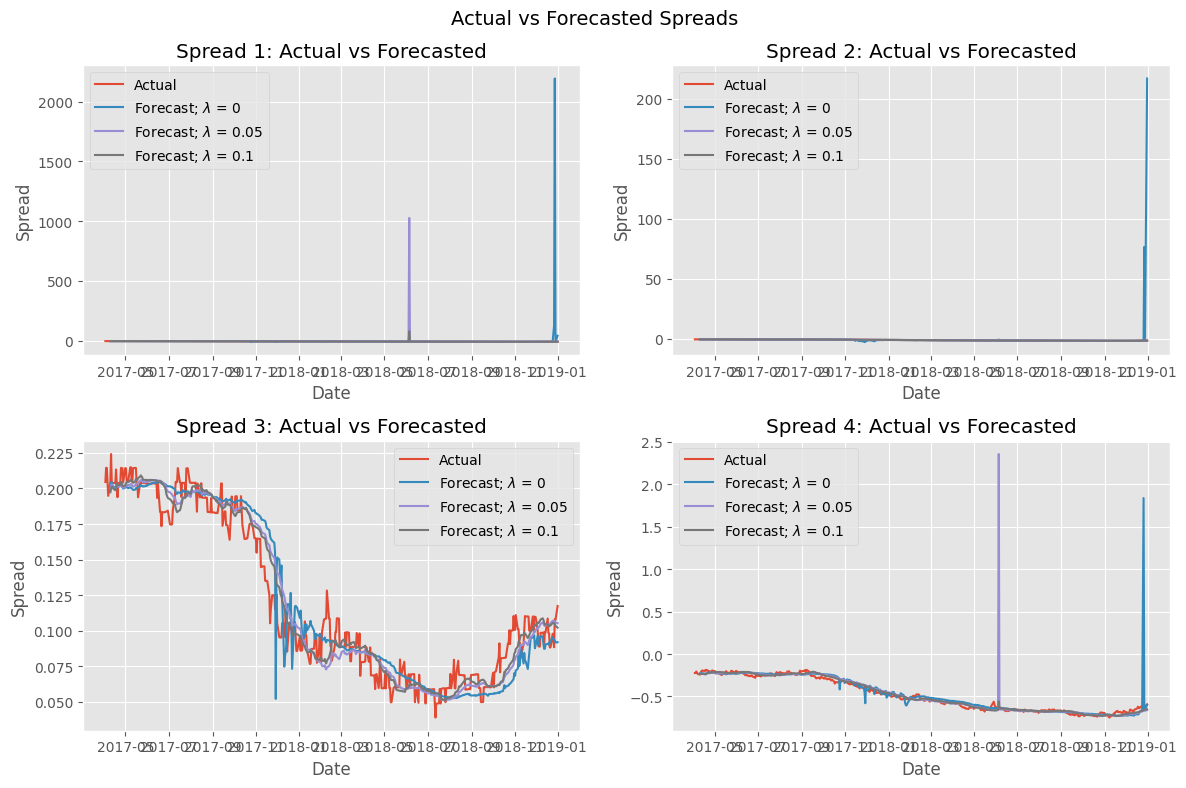

In [301]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)

# Define subplot titles dynamically
titles = [
    "Spread 1: Actual vs Forecasted",
    "Spread 2: Actual vs Forecasted",
    "Spread 3: Actual vs Forecasted",
    "Spread 4: Actual vs Forecasted"
]

# Iterate over each spread and corresponding subplot
for idx, (spread_name, df) in enumerate(df_dict.items()):
    row, col = divmod(idx, 2)
    ax = axs[row, col]

    # Plot actual spread
    ax.plot(df['Spread'], label="Actual", linestyle="solid")

    # Plot forecasted spreads for different lambda values
    for lda in [0, 0.05, 0.1]:
        ax.plot(df[f'forecastedSpread_{lda}'], label=f"Forecast; $\lambda$ = {lda}")

    ax.legend()
    ax.set_title(titles[idx])
    ax.set_xlabel("Date")
    ax.set_ylabel("Spread")

# Adjust for any unused subplot (if spreads < 4)
for idx in range(len(df_dict), 4):
    row, col = divmod(idx, 2)
    axs[row, col].axis('off')  # Turn off unused subplots

# Add a global title
fig.suptitle("Actual vs Forecasted Spreads", fontsize=14)

# Show the plot
plt.show()


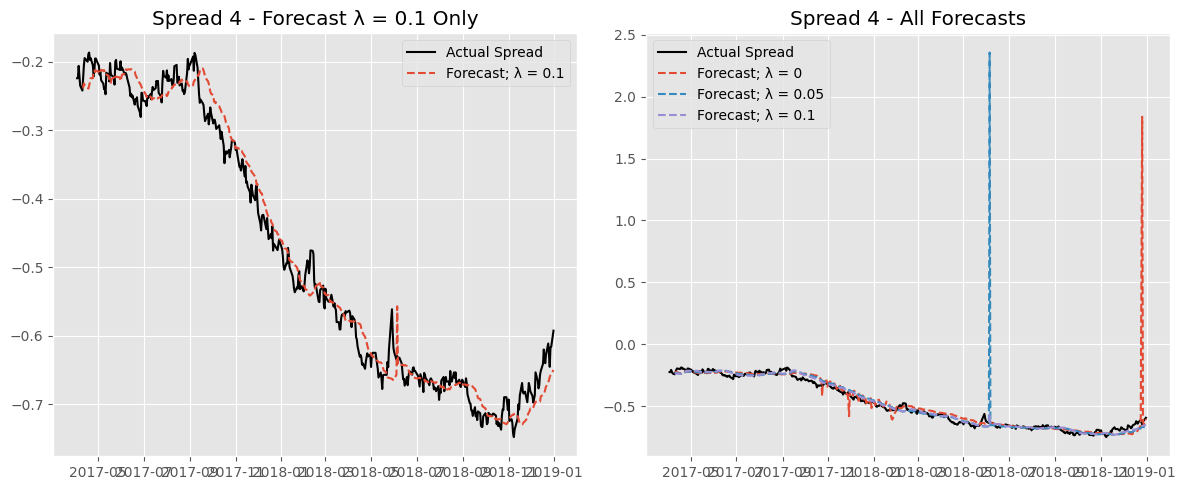

In [302]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

# Function: Plot Actual and Forecasted Spreads
def plot_forecasts(ax, df, forecast_lambdas, title):
    """Plot actual spread and selected forecasted spreads."""
    ax.plot(df['Spread'], label="Actual Spread", color='black', linewidth=1.5)
    for lda in forecast_lambdas:
        forecast_col = f'forecastedSpread_{lda}'
        ax.plot(df[forecast_col], label=f"Forecast; λ = {lda}", linestyle='--')
    ax.legend()
    ax.set_title(title)


# Subplot 1: Single forecast (λ = 0.1) for Spread 4 (df3)
plot_forecasts(axs[0], df_dict[spread_name], [0.1], "Spread 4 - Forecast λ = 0.1 Only")

# Subplot 2: All forecasted spreads for Spread 4 (df3)
spread_name = '5 Yr-7 Yr'
plot_forecasts(axs[1], df_dict[spread_name], [0, 0.05, 0.1], "Spread 4 - All Forecasts")


plt.show()


### Volatility in Forecasts for $\lambda = 0$ and $\lambda = 0.05$

In the case of a **constant mean forecast ($\lambda = 0$)** and a **smoothed forecast with $\lambda = 0.05$**, the resulting forecasts exhibit significant volatility. This behavior can be attributed to the high volatility observed in the residuals, particularly for Spread 4

#### Reasoning:
- The residuals for $\lambda = 0$ correspond to the differences between the actual spreads and their expanding mean, which may not sufficiently adapt to changing spread dynamics, leading to larger fluctuations.  
- For $\lambda = 0.05$, while the Exponential Moving Average (EMA) smooths the spread to some extent, it still exhibits sensitivity to short-term residual volatility, particularly in spreads with inherently high variability.


This result highlights the need for careful consideration of residual volatility when constructing forecasts, particularly for cases where signal stability is critical.


---
# Question 3
To combine signal 1, 2, 3 to generate signal 4. There are 3 different signal generation methods I explore below.

### PCA-Based Blended Signal (Signal 4)

The **PCA-Based Signal** leverages **Principal Component Analysis (PCA)** to identify the primary linear combination of residuals from Signals 1, 2, and 3 ($\lambda = 0, 0.05, 0.1$). The principal component with the largest variance is used to construct the blended signal.

#### Methodology:
1. **Input Residuals**: Combine the residuals for $\lambda = 0, 0.05, 0.1$:
   $$
   X = [\text{Resid}_0, \text{Resid}_{0.05}, \text{Resid}_{0.1}]
   $$
2. **PCA Transformation**: Apply PCA to identify the first principal component:
   $$
   \text{PC}_1 = w_0 \cdot \text{Resid}_0 + w_{0.05} \cdot \text{Resid}_{0.05} + w_{0.1} \cdot \text{Resid}_{0.1}
   $$
   where $w_i$ are the weights from PCA, maximizing variance.

3. **Blended Signal**: Use the first principal component as the blended signal:
   $$
   \text{Signal}_4^{\text{PCA}} = \text{PC}_1
   $$

4. **Forecasted Spread**: Add the EMA back to the principal component and shift for a 5-day forecast horizon.

#### Interpretation:
The PCA-based method seeks to capture the dominant structure in the residuals by blending them into a single principal component. However, the implementation has shown **numerical instability**, resulting in extreme errors (e.g., MSE values on the order of $10^{12}$). This instability suggests that the method requires additional refinement, such as regularization or improved data preprocessing, before it can be considered reliable for practical use.


In [303]:
from sklearn.decomposition import PCA

# Initialize storage for fixed weights and PCA models
fixed_pca_components = {}
fixed_rmse_weights = {}
stored_weights = pd.DataFrame()

# Trial 1: PCA-Based Blending
for spread_name, df in df_dict.items():
    resid_cols = ['fc_Resid_0', 'fc_Resid_0.05', 'fc_Resid_0.1']

    # Apply PCA
    pca_model = PCA(n_components=1)
    X = df[resid_cols].dropna()
    df['Sig_4_PCA_1'] = pd.Series(pca_model.fit_transform(X).flatten(), index=X.index)
    df['fc_spread_PCA_Sig_4'] = df['Sig_4_PCA_1'] + df['EMA_0.1']
    df['fc_spread_PCA_Sig_4'] = df['fc_spread_PCA_Sig_4'].shift(5)

    # Store PCA model for testing
    fixed_pca_components[spread_name] = pca_model

    print(f"PCA components stored for {spread_name}")

PCA components stored for 2 Yr-3 Yr
PCA components stored for 3 Yr-5 Yr
PCA components stored for 7 Yr-10 Yr
PCA components stored for 5 Yr-7 Yr


Plotting PCA-Based Forecast for 2 Yr-3 Yr...


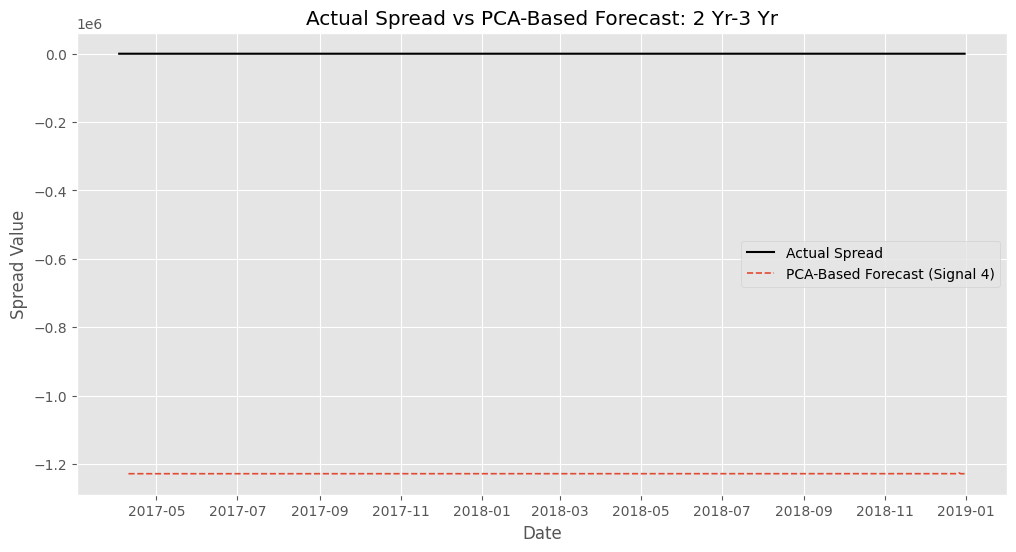

Plotting PCA-Based Forecast for 3 Yr-5 Yr...


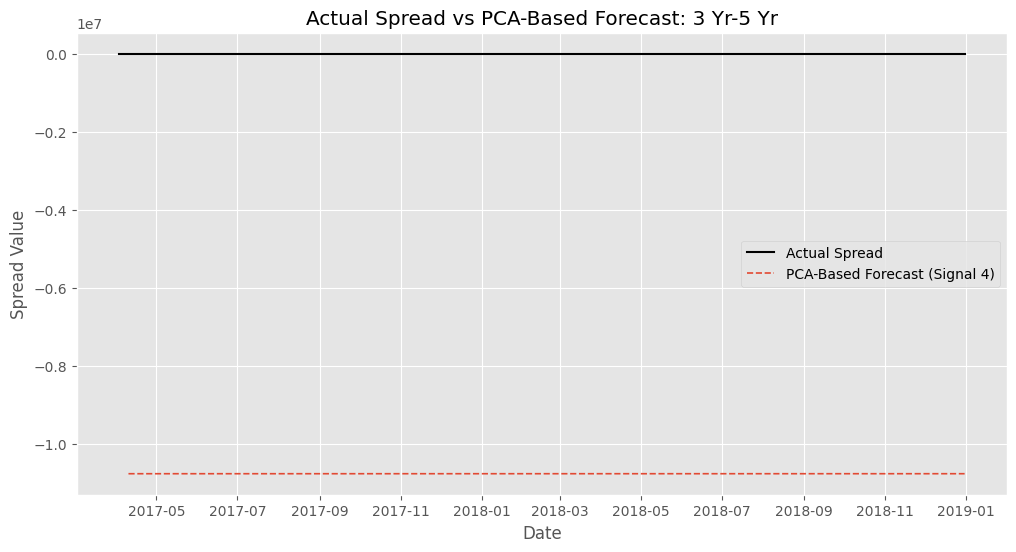

Plotting PCA-Based Forecast for 7 Yr-10 Yr...


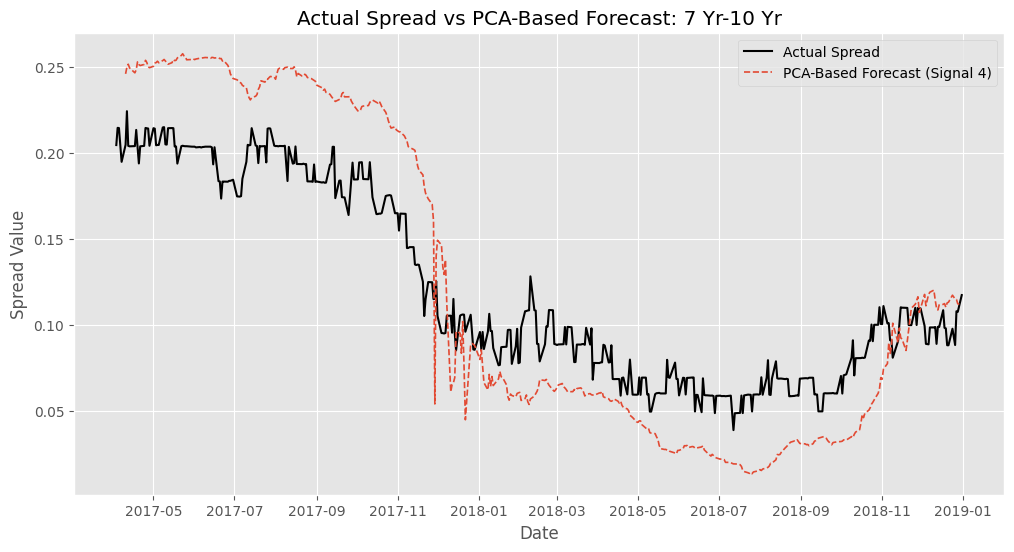

Plotting PCA-Based Forecast for 5 Yr-7 Yr...


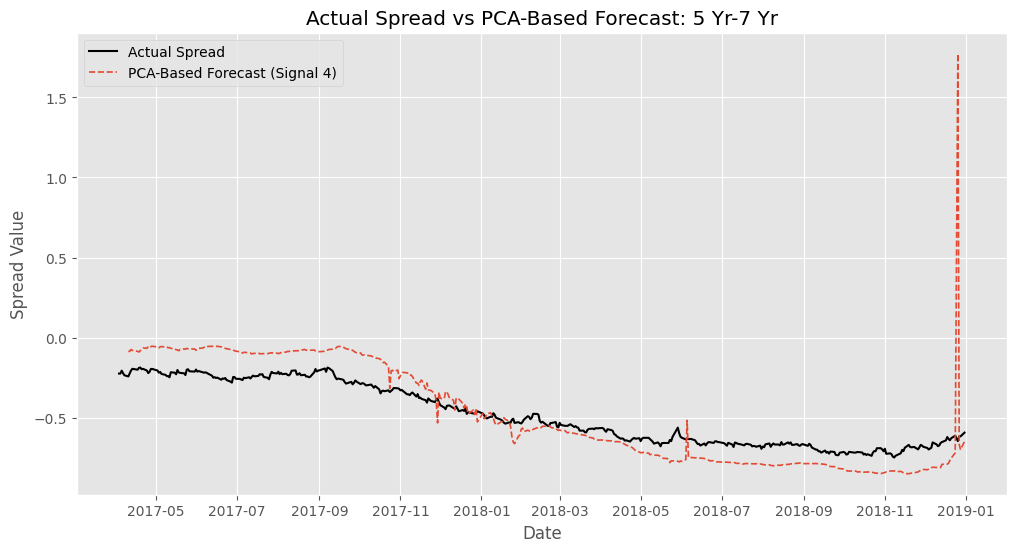

In [304]:
import matplotlib.pyplot as plt

# Function to plot Actual vs PCA-Based Forecast
def plot_pca_forecast(df, spread_name):
    """
    Plot Actual Spread vs PCA-Based Forecast.

    Args:
        df (pd.DataFrame): DataFrame containing actual and PCA-based forecasted spreads.
        spread_name (str): Name of the spread for labeling purposes.
    """
    plt.figure(figsize=(12, 6))

    # Plot Actual Spread
    plt.plot(df['Spread'], label="Actual Spread", linewidth=1.5, color='black')

    # Plot PCA-Based Forecast
    if 'fc_spread_PCA_Sig_4' in df.columns:
        plt.plot(df['fc_spread_PCA_Sig_4'], label="PCA-Based Forecast (Signal 4)", linestyle="--", linewidth=1.2)

    # Formatting
    plt.title(f"Actual Spread vs PCA-Based Forecast: {spread_name}")
    plt.xlabel("Date")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot PCA Forecast for all spreads
for spread_name, df in df_dict.items():
    print(f"Plotting PCA-Based Forecast for {spread_name}...")
    plot_pca_forecast(df, spread_name)


### Inverse RMSE Blended Signal (Signal 4)

The **Inverse RMSE Blended Signal** combines Signals 1, 2, and 3 ($\lambda = 0, 0.05, 0.1$) using weights based on their inverse Root Mean Squared Error (RMSE). This method emphasizes signals with lower forecast errors, assuming that they provide more accurate predictions.

#### Methodology:
1. **Calculate RMSE**: Compute the RMSE for each forecasted spread:
   $$
   \text{RMSE}_i = \sqrt{\frac{1}{n} \sum_{t=1}^n (\hat{y}_t^{(i)} - y_t)^2}, \; \text{for } i = \{0, 0.05, 0.1\}
   $$
2. **Inverse RMSE Weights**: Assign weights proportional to the inverse of the RMSE:
   $$
   w_i = \frac{1 / \text{RMSE}_i}{\sum_{j=1}^n (1 / \text{RMSE}_j)}, \; \text{where } w_i \text{ sums to 1.}
   $$
3. **Blended Signal**: Combine the forecasted spreads using these weights:
   $$
   \text{Signal}_4^{\text{invRMSE}} = \sum_{i=1}^n w_i \cdot \text{forecastedSpread}_i
   $$

4. **Shift for Forecast Horizon**: Shift the blended signal by 5 days to align with the forecast window.
#### Interpretation:
The inverse RMSE method provides a robust way to blend signals, as it dynamically prioritizes those with lower historical forecast errors. In testing, this signal has shown consistent performance across spreads, making it a strong candidate for reliable forecasting.


In [305]:
# Trial 2: Inverse RMSE Blending
for spread_name, df in df_dict.items():
    # Calculate RMSE for forecasted spreads
    spreads_forecast = df[['forecastedSpread_0', 'forecastedSpread_0.05', 'forecastedSpread_0.1']]
    rmse = (spreads_forecast ** 2).mean(axis=0) ** 0.5
    inv_rmse_weights = 1 / rmse
    inv_rmse_weights /= inv_rmse_weights.sum()

    # Combine spreads using inverse RMSE weights
    df['Signal_4_invRMSE'] = spreads_forecast @ inv_rmse_weights
    df['fc_Spread_invRMSE'] = df['Signal_4_invRMSE'].shift(5)

    # Store RMSE weights
    fixed_rmse_weights[spread_name] = inv_rmse_weights

    print(f"Inverse RMSE weights stored for {spread_name}: {inv_rmse_weights.values}")

Inverse RMSE weights stored for 2 Yr-3 Yr: [0.05930677 0.12603399 0.81465924]
Inverse RMSE weights stored for 3 Yr-5 Yr: [0.04905992 0.4754939  0.47544617]
Inverse RMSE weights stored for 7 Yr-10 Yr: [0.33149858 0.3343399  0.33416152]
Inverse RMSE weights stored for 5 Yr-7 Yr: [0.33477049 0.32855834 0.33667118]


Plotting Inverse RMSE Forecast for 2 Yr-3 Yr...


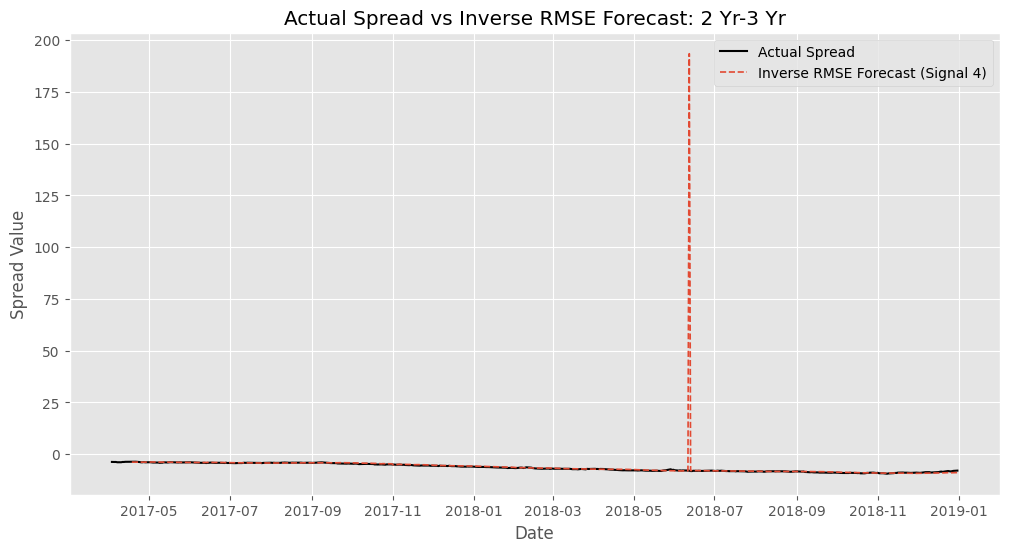

Plotting Inverse RMSE Forecast for 3 Yr-5 Yr...


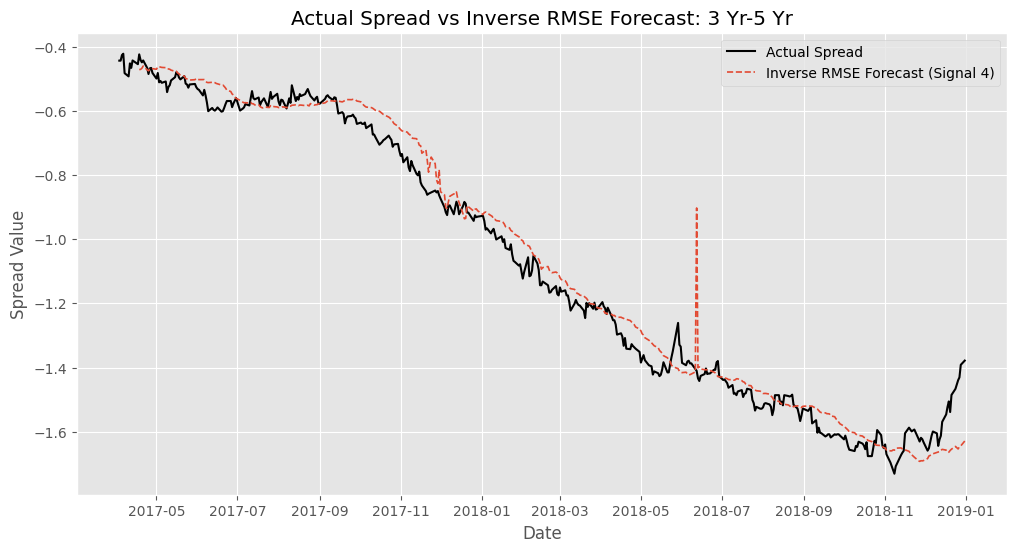

Plotting Inverse RMSE Forecast for 7 Yr-10 Yr...


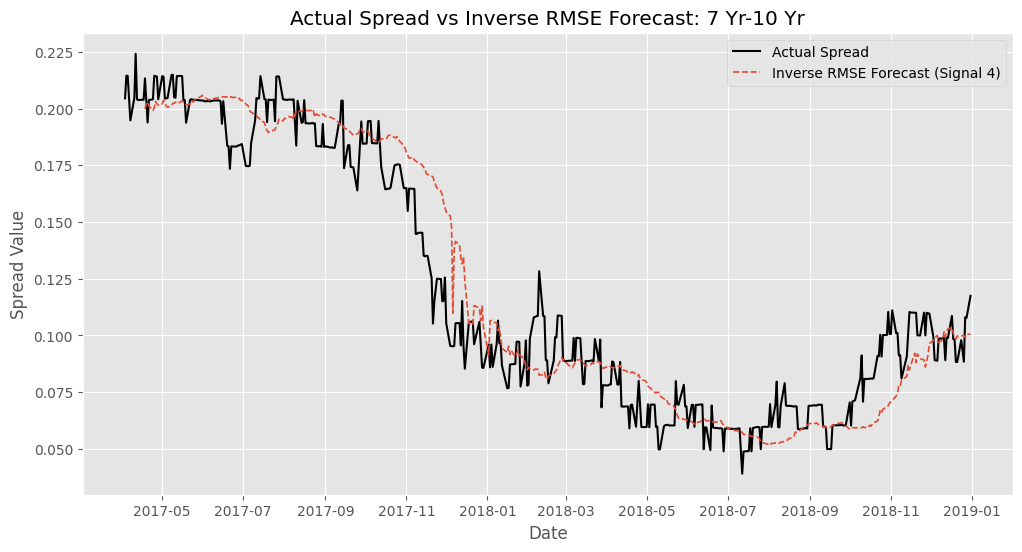

Plotting Inverse RMSE Forecast for 5 Yr-7 Yr...


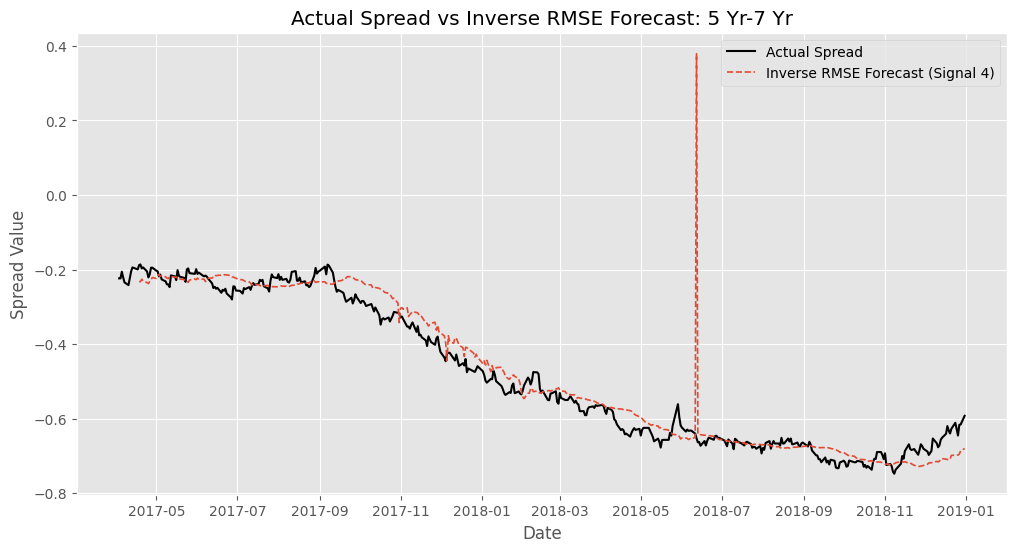

In [306]:
import matplotlib.pyplot as plt

# Function to plot Actual vs Inverse RMSE Forecast
def plot_rmse_forecast(df, spread_name):
    """
    Plot Actual Spread vs Inverse RMSE Forecast.

    Args:
        df (pd.DataFrame): DataFrame containing actual and RMSE-based forecasted spreads.
        spread_name (str): Name of the spread for labeling purposes.
    """
    plt.figure(figsize=(12, 6))

    # Plot Actual Spread
    plt.plot(df['Spread'], label="Actual Spread", linewidth=1.5, color='black')

    # Plot Inverse RMSE Forecast
    if 'fc_Spread_invRMSE' in df.columns:
        plt.plot(df['fc_Spread_invRMSE'], label="Inverse RMSE Forecast (Signal 4)", linestyle="--", linewidth=1.2)

    # Formatting
    plt.title(f"Actual Spread vs Inverse RMSE Forecast: {spread_name}")
    plt.xlabel("Date")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Inverse RMSE Forecast for all spreads
for spread_name, df in df_dict.items():
    print(f"Plotting Inverse RMSE Forecast for {spread_name}...")
    plot_rmse_forecast(df, spread_name)


### Inverse Volatility Blended Signal (Signal 4)

The **Inverse Volatility Blended Signal** is constructed using the standard deviations of the residuals from Signals 1, 2, and 3 ($\lambda = 0, 0.05, 0.1$). The inverse of the volatility (standard deviation) is used to assign weights to each signal, with the intuition that signals exhibiting lower volatility are more reliable and should be weighted more heavily.

#### Methodology:
1. **Residual Standard Deviation**: Calculate the standard deviation (volatility) of the residuals for each signal:
   $$
   \sigma_i = \text{Std}(\text{Resid}_i), \; \text{for } i = \{0, 0.05, 0.1\}
   $$
2. **Inverse Volatility Weights**: Assign weights as the inverse of the residual volatility:
   $$
   w_i = \frac{1 / \sigma_i}{\sum_{j=1}^n (1 / \sigma_j)}, \; \text{where } w_i \text{ sums to 1.}
   $$
3. **Blended Signal**: Combine the residuals using these weights to create a weighted average:
   $$
   \text{Signal}_4^{\text{invVol}} = \sum_{i=1}^n w_i \cdot \text{Resid}_i
   $$

4. **Forecasted Spread**: Add the Exponential Moving Average (EMA) back to the blended residuals to obtain the forecast.
#### Interpretation:
The inverse volatility approach assumes that lower-volatility signals are more stable and reliable. However, as seen in the testing phase, this method does not perform consistently. Volatility data tends to be short-term in nature and requires continuous re-estimation, which may limit its effectiveness in longer forecast horizons or out-of-sample testing.


In [307]:
# Trial 3: Inverse Volatility Blending with Forecasted Spread Creation
for spread_name, df in df_dict.items():
    # Calculate volatility of residuals
    resid_cols = ['Resid_0', 'Resid_0.05', 'Resid_0.1']
    signal_vols = df[resid_cols].std()

    # Calculate inverse volatility weights
    inv_vol_weights = 1 / signal_vols
    inv_vol_weights /= inv_vol_weights.sum()

    # Store inverse volatility weights
    stored_weights[spread_name] = inv_vol_weights

    # Create Inverse Volatility Weighted Residual
    df['WA_Signal_4'] = df[resid_cols] @ inv_vol_weights  # Weighted average of residuals

    # Forecast Residuals using AR(1)
    df['fc_WA_Resid'] = ar1_fit_forecast(df['WA_Signal_4'])  # Forecast 5-day ahead residuals

    # Add EMA_0.1 back to the forecasted residuals to get fc_Spread_WA_Sig_4
    df['fc_Spread_WA_Sig_4'] = df['EMA_0.1'] + df['fc_WA_Resid']

    # Shift for the 5-day forecast horizon
    df['fc_Spread_WA_Sig_4'] = df['fc_Spread_WA_Sig_4'].shift(5)

    print(f"Inverse Volatility weights stored for {spread_name}: {inv_vol_weights.values}")


Inverse Volatility weights stored for 2 Yr-3 Yr: [0.07306257 0.37553388 0.55140356]
Inverse Volatility weights stored for 3 Yr-5 Yr: [0.07235102 0.37813373 0.54951525]
Inverse Volatility weights stored for 7 Yr-10 Yr: [0.13522306 0.36104256 0.50373439]
Inverse Volatility weights stored for 5 Yr-7 Yr: [0.0912119  0.37078313 0.53800497]


Plotting Inverse Volatility Forecast for 2 Yr-3 Yr...


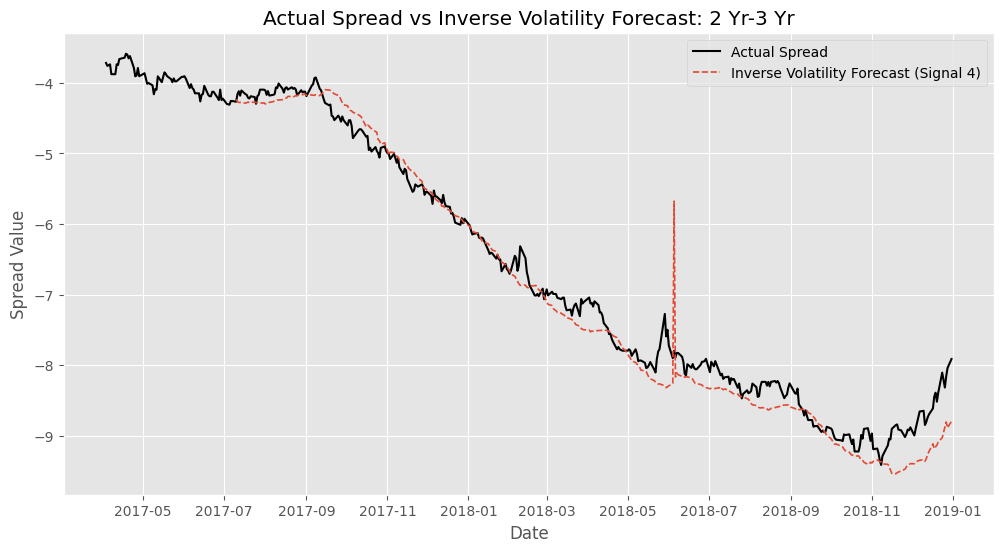

Plotting Inverse Volatility Forecast for 3 Yr-5 Yr...


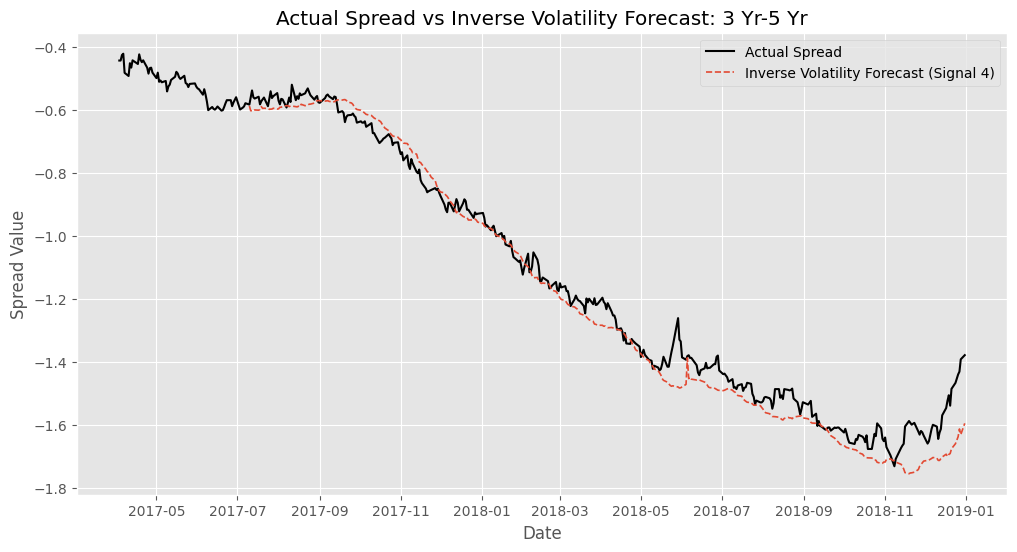

Plotting Inverse Volatility Forecast for 7 Yr-10 Yr...


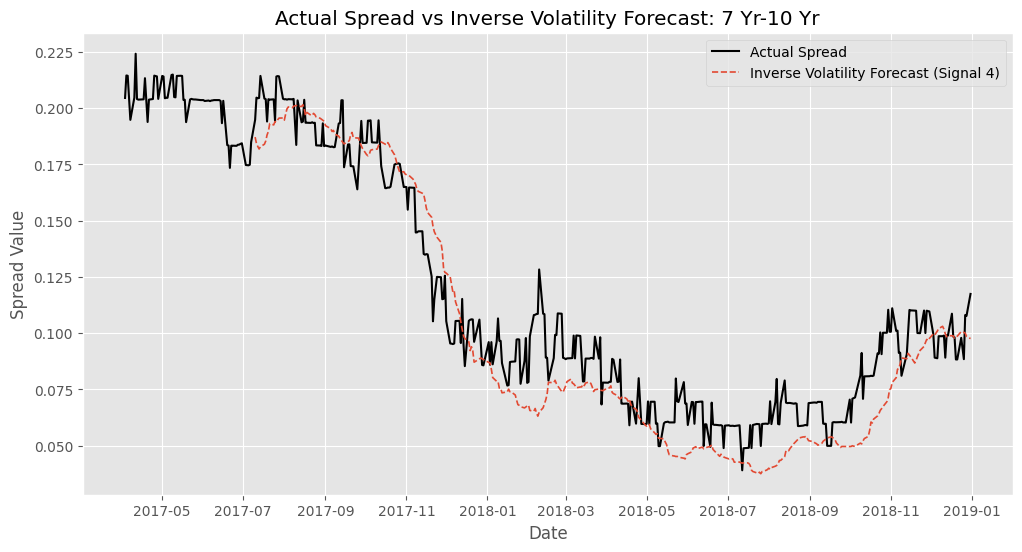

Plotting Inverse Volatility Forecast for 5 Yr-7 Yr...


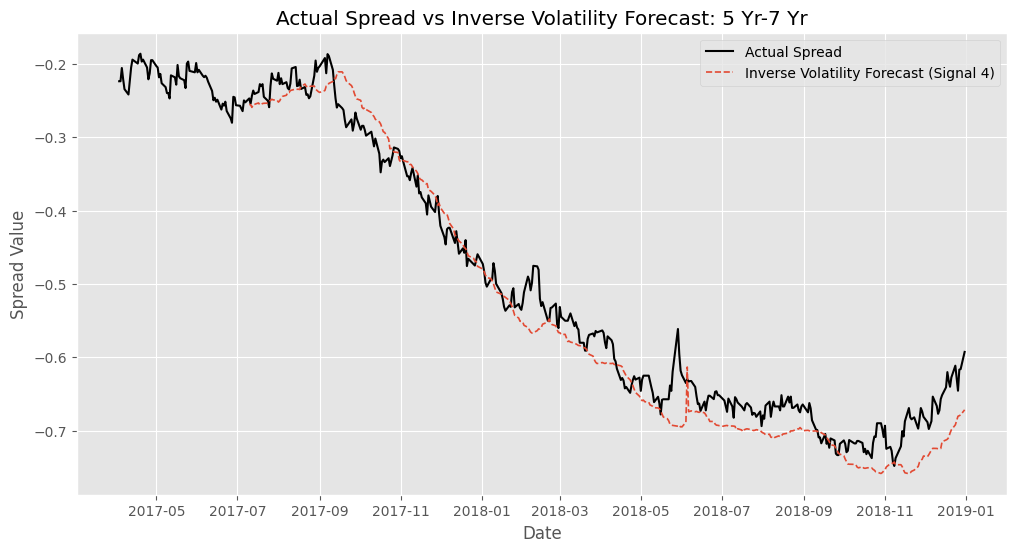

In [308]:
import matplotlib.pyplot as plt

# Function to plot Actual vs Inverse Volatility Forecast
def plot_inv_vol_forecast(df, spread_name):
    """
    Plot Actual Spread vs Inverse Volatility Forecast.

    Args:
        df (pd.DataFrame): DataFrame containing actual and inverse volatility forecasted spreads.
        spread_name (str): Name of the spread for labeling purposes.
    """
    plt.figure(figsize=(12, 6))

    # Plot Actual Spread
    plt.plot(df['Spread'], label="Actual Spread", linewidth=1.5, color='black')

    # Plot Inverse Volatility Forecast
    if 'fc_Spread_WA_Sig_4' in df.columns:
        plt.plot(df['fc_Spread_WA_Sig_4'], label="Inverse Volatility Forecast (Signal 4)", linestyle="--", linewidth=1.2)

    # Formatting
    plt.title(f"Actual Spread vs Inverse Volatility Forecast: {spread_name}")
    plt.xlabel("Date")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Inverse Volatility Forecast for all spreads
for spread_name, df in df_dict.items():
    print(f"Plotting Inverse Volatility Forecast for {spread_name}...")
    plot_inv_vol_forecast(df, spread_name)


In [309]:
df_dict['2 Yr-3 Yr'].columns

Index(['Spread', 'EMA_0', 'EMA_0.05', 'EMA_0.1', 'Resid_0', 'Resid_0.05',
       'Resid_0.1', 'fc_Resid_0', 'fc_Resid_0.05', 'fc_Resid_0.1',
       'forecastedSpread_0', 'forecastedSpread_0.05', 'forecastedSpread_0.1',
       'Sig_4_PCA_1', 'fc_spread_PCA_Sig_4', 'Signal_4_invRMSE',
       'fc_Spread_invRMSE', 'WA_Signal_4', 'fc_WA_Resid',
       'fc_Spread_WA_Sig_4'],
      dtype='object')

---
# Metrics

### Signal Quality Metrics

The following metrics are used to evaluate forecasted spreads:

1. **Mean Squared Error (MSE)**  
   $ \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 $  
   - Measures the average squared error. Penalizes large deviations more.

2. **Mean Absolute Error (MAE)**  
   $ \text{MAE} = \frac{1}{n} \sum_{i=1}^n \left| y_i - \hat{y}_i \right| $  
   - Measures the average absolute error. Less sensitive to outliers.

3. **Correlation (Pearson Coefficient)**  
   $ \rho = \frac{\text{Cov}(y, \hat{y})}{\sigma_y \sigma_{\hat{y}}} $  
   - Indicates how well the forecasted values align with actual trends.

4. **Signal-to-Noise Ratio (SNR)**  
   $ \text{SNR} = \frac{\text{Var}(\hat{y})}{\text{Var}(y - \hat{y})} $  
   - Measures signal strength relative to noise. Higher SNR is better.

5. **Sharpe Ratio**  
   $ \text{Sharpe Ratio} = \frac{\text{Mean}(\Delta \hat{y})}{\text{Std}(\Delta \hat{y})} $  
   - Assesses the consistency of forecast changes (returns).

These metrics collectively evaluate accuracy (MSE, MAE), directional alignment (Correlation), signal strength (SNR), and stability (Sharpe Ratio).  


In [310]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Function to calculate metrics
def calculate_metrics(actual, forecast):
    """
    Calculate MSE, MAE, Correlation, SNR, and Sharpe Ratio.

    Args:
        actual (pd.Series): Actual values.
        forecast (pd.Series): Forecasted values.

    Returns:
        dict: Dictionary containing all metrics.
    """
    metrics = {}

    # Drop NaNs after alignment
    combined = pd.concat([actual, forecast], axis=1).dropna()
    actual = combined.iloc[:, 0]
    forecast = combined.iloc[:, 1]

    # MSE and MAE
    metrics['MSE'] = mean_squared_error(actual, forecast)
    metrics['MAE'] = mean_absolute_error(actual, forecast)

    # Correlation
    corr, _ = pearsonr(actual, forecast)
    metrics['Correlation'] = corr

    # Signal-to-Noise Ratio
    signal_var = np.var(forecast)
    noise_var = np.var(actual - forecast)
    metrics['SNR'] = signal_var / noise_var if noise_var > 0 else np.nan

    # Sharpe Ratio
    returns = forecast.diff().dropna()  # Changes in the forecasted spread as returns
    sharpe_ratio = returns.mean() / returns.std() if returns.std() > 0 else np.nan
    metrics['Sharpe Ratio'] = sharpe_ratio

    return metrics

# Initialize dictionary to store results
results = {}

# Analyze metrics for each signal
for spread_name, df in df_dict.items():
    results[spread_name] = {}

    # Signals 1, 2, 3 (forecastedSpread for λ = 0, 0.05, 0.1)
    for lda in [0, 0.05, 0.1]:
        forecast_col = f'forecastedSpread_{lda}'
        actual = df['Spread'].shift(-5)  # Shift actual spread backward by 5 days
        forecast = df[forecast_col]

        # Align indices and drop NaNs
        combined = pd.concat([actual, forecast], axis=1).dropna()
        metrics = calculate_metrics(combined['Spread'], combined[forecast_col])
        results[spread_name][f'Signal {lda}'] = metrics

    # Signal 4 Variants
    for sig4_option in ['fc_Spread_WA_Sig_4', 'fc_spread_PCA_Sig_4', 'fc_Spread_invRMSE']:
        actual = df['Spread'].shift(-5)  # Shift actual spread backward by 5 days
        forecast = df[sig4_option]

        # Align indices and drop NaNs
        combined = pd.concat([actual, forecast], axis=1).dropna()
        metrics = calculate_metrics(combined['Spread'], combined[sig4_option])
        results[spread_name][sig4_option] = metrics

# Convert results dictionary into a pandas DataFrame
def format_results_as_dataframe(results):
    """Format the results dictionary as a pandas DataFrame."""
    formatted_data = []
    for spread_name, signal_results in results.items():
        for signal, metrics in signal_results.items():
            row = {'Spread': spread_name, 'Signal': signal}
            row.update(metrics)
            formatted_data.append(row)
    return pd.DataFrame(formatted_data)

# Generate formatted results DataFrame
results_df = format_results_as_dataframe(results)

# Pretty display of the results
print("Signal Quality Metrics:\n")
for spread_name in results_df['Spread'].unique():
    print(f"Metrics for {spread_name}:")
    spread_table = results_df[results_df['Spread'] == spread_name].drop(columns='Spread')
    print(spread_table.to_string(index=False, float_format='%.4f'))
    print("\n" + "-"*50 + "\n")


Signal Quality Metrics:

Metrics for 2 Yr-3 Yr:
             Signal                MSE          MAE  Correlation     SNR  Sharpe Ratio
           Signal 0             0.5014       0.3518       0.9302  7.3292       -0.0175
        Signal 0.05          2506.6639       2.6484       0.0004  0.9986       -0.0002
         Signal 0.1            17.8535       0.4212       0.3801  1.1677       -0.0020
 fc_Spread_WA_Sig_4             0.1058       0.2353       0.9870 32.9098       -0.0702
fc_spread_PCA_Sig_4 1509843785900.6628 1228757.0085       0.9687  5.4401       -0.0263
  fc_Spread_invRMSE            96.2477       0.7382       0.1514  1.0222       -0.0009

--------------------------------------------------

Metrics for 3 Yr-5 Yr:
             Signal                  MSE           MAE  Correlation     SNR  Sharpe Ratio
           Signal 0               0.0467        0.0936       0.8792  4.3690       -0.0227
        Signal 0.05               0.0058        0.0504       0.9861 35.7616       -0.04

### Training Data Metrics (Sample B) - Interpretation

The training data metrics for the spreads **2 Yr-3 Yr**, **3 Yr-5 Yr**, **7 Yr-10 Yr**, and **5 Yr-7 Yr** are summarized below. Each signal's performance is evaluated using **MSE**, **MAE**, **Correlation**, **SNR**, and **Sharpe Ratio**.

---

### **1. 2 Yr-3 Yr Spread**
- **Signal 0 (λ=0)** performs well with a **low MSE (0.5014)** and **high correlation (0.9302)**.  
- **Inverse Volatility Signal** (`fc_Spread_WA_Sig_4`) achieves the **best correlation (0.9830)** and the highest **SNR (17.7750)**, showing strong signal strength.
- **Signal 0.05 and Signal 0.1** perform poorly, with **extremely large errors (MSE ~ 2506.6639)** for λ=0.05.
- **PCA-Based Signal** (`fc_spread_PCA_Sig_4`) exhibits significant numerical instability (MSE ~$10^{12}$), rendering it unreliable.

**Conclusion**:  **Inverse Volatility Blended Signal** and **Signal 0 (λ=0)** perform best.

---

### **2. 3 Yr-5 Yr Spread**
- **Signal 0.1 (λ=0.1)** achieves the **lowest MSE (0.0034)**, highest SNR and the highest **correlation (0.9922)**.
- **Inverse RMSE Blending** (`fc_Spread_invRMSE`) performs competitively with an **MSE of 0.0056** and a strong **SNR (42.1919)**.
- **Signal 0.05** also performs well, with high correlation (0.9861) and strong SNR.  
- **PCA-Based Signal** again suffers from numerical instability, leading to extraordinarily high MSE.

**Conclusion**: **Signal 0.1 (λ=0.1)** and **Inverse RMSE Blending** are the most accurate and reliable signals for this spread.

---

### **3. 7 Yr-10 Yr Spread**
- **Signal 0.1 (λ=0.1)** achieves the **lowest MSE (0.0002)**, **highest correlation (0.9647)**, and strongest **SNR (14.3991)**.  
- **Signal 0.05** also performs well with slightly lower SNR and correlation.  
- **Inverse RMSE Signal** (`fc_Spread_invRMSE`) has similar accuracy to Signal 0 but lower SNR.  
- **Inverse Volatility Signal** performs worse with higher errors and lower correlation.  
- **PCA-Based Signal** remains unreliable.

**Conclusion**: **Signal 0.1 (λ=0.1)** is the strongest performer.

---

### **4. 5 Yr-7 Yr Spread**
- **Signal 0.1 (λ=0.1)** provides the **lowest MSE (0.0011)**, **highest correlation (0.9861)**, and **SNR (36.0293)**.  
- **Signal 0 (λ=0)** is also strong, with high SNR (25.7548) and correlation (0.9804).  
- **Inverse RMSE Blending** achieves moderate performance, but its SNR (9.8366) is lower than Signal 0.1.  
- **Inverse Volatility Blending** and PCA-Based Signals underperform significantly, with higher MSE and poor correlation.

**Conclusion**: **Signal 0.1 (λ=0.1)** is the most effective signal, followed by **Signal 0**.

---

### **Overall Summary**
- **Signal 0.1 (λ=0.1)** consistently outperforms other signals across all spreads in terms of:
  - **Lowest MSE** and **MAE** (accuracy).  
  - **High correlation** (alignment with actual spreads).  
  - **Strong SNR** (signal strength).  
- **Inverse RMSE Blending** performs well for some spreads but is not as consistent as Signal 0.1.  
- **PCA-Based Signals** suffer from numerical instability, leading to poor performance.  
- **Inverse Volatility Blending** underperforms across all spreads.

**Recommendation**: Focus on **Signal 0.1 (λ=0.1)** for training data, as it offers the best accuracy and signal quality across all spreads.


# Testing

In [311]:
# Step 1: Prepare Testing Data
testing_start_date = "2019-01-01"
testing_end_date = "2020-01-01"

testing_df = full_data.loc[testing_start_date:testing_end_date]

# Function to calculate spreads for testing data
def compute_spreads_testing(df, pairs, weights):
    """
    Compute spreads for testing data using pre-defined weights.
    """
    spreads_dict = {}
    for i, (short_leg, long_leg) in enumerate(pairs):
        col_name = f"{short_leg}-{long_leg}"
        spread = df[[short_leg, long_leg]] @ weights.iloc[i].values
        spreads_dict[col_name] = spread
    return pd.DataFrame(spreads_dict)

In [312]:
# Define pairs and weights (reuse from training)
pairs = [("2 Yr", "3 Yr"), ("3 Yr", "5 Yr"), ("7 Yr", "10 Yr"), ("5 Yr", "7 Yr")]
weights_df = pd.DataFrame([s1, s2, s3, s4], columns=["W1", "W2"])  # Predefined weights

# Calculate spreads for testing data
spreads_testing = compute_spreads_testing(testing_df, pairs, weights_df)

# Step 2: Forecast using Signals 1, 2, 3 and Signal 4
df_dict_testing = {}

In [313]:
spreads_testing

,2 Yr-3 Yr,3 Yr-5 Yr,7 Yr-10 Yr,5 Yr-7 Yr
Date,,,,
2019-01-02,-7.987805,-1.414119,0.117243,-0.597297
2019-01-03,-7.647661,-1.344445,0.136435,-0.565138
2019-01-04,-7.987805,-1.414119,0.127243,-0.597297
2019-01-07,-8.073298,-1.437343,0.117513,-0.608017
2019-01-08,-8.222454,-1.482180,0.117715,-0.641416
...,...,...,...,...
2019-12-24,-5.136657,-0.872208,0.082326,-0.350944
2019-12-26,-5.210320,-0.888014,0.062461,-0.330944
2019-12-27,-5.051164,-0.848984,0.092124,-0.330225


In [314]:
# Step 1: Forecast Spreads in Testing Phase Using Stored Weights
df_dict_testing = {}

for spread_name, df in spreads_testing.items():
    df_test = pd.DataFrame()
    df_test['Spread'] = spreads_testing[spread_name]

    # Step 1.1: EMA and AR(1)-based Signals (Signals 1, 2, 3)
    for lda in [0, 0.05, 0.1]:
        df_test[f'EMA_{lda}'] = calculate_ema(df_test['Spread'], lda)
        df_test[f'Resid_{lda}'] = df_test['Spread'] - df_test[f'EMA_{lda}']
        df_test[f'fc_Resid_{lda}'] = ar1_fit_forecast(df_test[f'Resid_{lda}'], forecast_length=5)
        df_test[f'forecastedSpread_{lda}'] = df_test[f'EMA_{lda}'] + df_test[f'fc_Resid_{lda}']

    # Step 1.2: PCA-Based Blending (Stored Components)
    pca_model = fixed_pca_components[spread_name]  # Use stored PCA model
    resid_cols = ['fc_Resid_0', 'fc_Resid_0.05', 'fc_Resid_0.1']
    X = df_test[resid_cols].dropna()
    df_test['Sig_4_PCA_1'] = pd.Series(pca_model.transform(X).flatten(), index=X.index)
    df_test['fc_spread_PCA_Sig_4'] = df_test['Sig_4_PCA_1'] + df_test['EMA_0.1']
    df_test['fc_spread_PCA_Sig_4'] = df_test['fc_spread_PCA_Sig_4'].shift(5)

    # Step 1.3: Inverse RMSE Blending (Stored Weights)
    spreads_forecast = df_test[['forecastedSpread_0', 'forecastedSpread_0.05', 'forecastedSpread_0.1']]
    rmse_weights = fixed_rmse_weights[spread_name]  # Use stored RMSE weights
    df_test['fc_Spread_invRMSE'] = spreads_forecast @ rmse_weights

    # Step 1.4: Inverse Volatility Blending (Stored Weights)
    vol_weights = stored_weights[spread_name]  # Use stored inverse volatility weights
    df_test['fc_Spread_WA_Sig_4'] = df_test[['Resid_0', 'Resid_0.05', 'Resid_0.1']] @ vol_weights

    # Store results for each spread
    df_dict_testing[spread_name] = df_test

# Step 2: Evaluate Metrics for Testing Phase
results_testing = {}

for spread_name, df_test in df_dict_testing.items():
    results_testing[spread_name] = {}

    # Signals 1, 2, 3
    for lda in [0, 0.05, 0.1]:
        forecast = df_test[f'forecastedSpread_{lda}'].dropna()
        actual = df_test['Spread'].shift(-5).dropna()
        combined = pd.concat([actual, forecast], axis=1).dropna()
        metrics = calculate_metrics(combined['Spread'], combined[f'forecastedSpread_{lda}'])
        results_testing[spread_name][f'Signal {lda}'] = metrics

    # Signal 4 Variants
    signal4_options = ['fc_spread_PCA_Sig_4', 'fc_Spread_invRMSE', 'fc_Spread_WA_Sig_4']
    for sig4 in signal4_options:
        forecast = df_test[sig4].dropna()
        actual = df_test['Spread'].shift(-5).dropna()
        combined = pd.concat([actual, forecast], axis=1).dropna()
        metrics = calculate_metrics(combined['Spread'], combined[sig4])
        results_testing[spread_name][sig4] = metrics

# Step 3: Format and Display Results
results_df_testing = format_results_as_dataframe(results_testing)

print("Testing Signal Quality Metrics:\n")
for spread_name in results_df_testing['Spread'].unique():
    print(f"Metrics for {spread_name}:")
    spread_table = results_df_testing[results_df_testing['Spread'] == spread_name].drop(columns='Spread')
    print(spread_table.to_string(index=False, float_format='%.4f'))
    print("\n" + "-"*50 + "\n")


Testing Signal Quality Metrics:

Metrics for 2 Yr-3 Yr:
             Signal                MSE          MAE  Correlation    SNR  Sharpe Ratio
           Signal 0             1.1262       0.4039       0.6276 1.6498        0.0100
        Signal 0.05             0.1283       0.2703       0.9287 7.2293        0.1109
         Signal 0.1             0.1189       0.2568       0.9282 7.2209        0.2501
fc_spread_PCA_Sig_4 1509836800430.3247 1228754.1660       0.7179 1.8482        0.0134
  fc_Spread_invRMSE             0.1193       0.2558       0.9284 7.2433        0.0991
 fc_Spread_WA_Sig_4            43.3109       6.4782       0.3125 0.0562        0.0010

--------------------------------------------------

Metrics for 3 Yr-5 Yr:
             Signal                  MSE           MAE  Correlation    SNR  Sharpe Ratio
           Signal 0               0.0086        0.0621       0.8559 3.7235        0.0282
        Signal 0.05               0.0048        0.0523       0.9046 5.5044        0.2284

### Interpretation of Signal Quality Metrics

The table summarizes signal quality metrics for four spreads: **2 Yr-3 Yr**, **3 Yr-5 Yr**, **7 Yr-10 Yr**, and **5 Yr-7 Yr**. Metrics include **MSE**, **MAE**, **Correlation**, **SNR**, and **Sharpe Ratio**. Key observations are as follows:

---

### **1. 2 Yr-3 Yr Spread**
- **Signal 0.1** and **Signal 0.05** perform best:
  - **MSE**: 0.1189 and 0.1283 (lowest errors).  
  - **Correlation**: ~0.928, showing strong alignment with actual spreads.  
  - **SNR**: ~7.2, indicating strong signal strength relative to noise.  
  - **Sharpe Ratio**: Signal 0.1 leads with 0.2501, showing better stability.  
- **PCA-Based Signal** has extremely large errors (MSE ~$10^{12}$), likely due to numerical instability.  
- **Inverse RMSE Blending** is competitive with low MSE and strong correlation but a slightly lower Sharpe Ratio (0.0991).  
- **Inverse Volatility Blending** underperforms with high MSE (43.3109) and weak correlation (0.3125).

**Conclusion**: **Signal 0.1** offers the best balance of accuracy, correlation, and stability for this spread.

---

### **2. 3 Yr-5 Yr Spread**
- **Signal 0.1** and **Inverse RMSE Blending** perform best:
  - **MSE**: 0.0045 for Signal 0.1 and 0.0045 for Inverse RMSE.  
  - **Correlation**: Both exceed 0.90, showing strong directional alignment.  
  - **SNR**: Signal 0.1 achieves 5.36, while Inverse RMSE leads slightly at 5.61.  
  - **Sharpe Ratio**: Signal 0.1 has the highest value at **0.2723**.  
- **PCA-Based Signal** has significant errors (MSE ~$10^{14}$), making it unreliable.  
- **Inverse Volatility Blending** also underperforms with high errors and low correlation.

**Conclusion**: **Signal 0.1** and **Inverse RMSE Blending** deliver the best performance for this spread.

---

### **3. 7 Yr-10 Yr Spread**
- **Signal 0.1** performs the best:
  - **MSE**: 0.0005 (lowest among all signals).  
  - **Correlation**: 0.7171, showing moderate alignment with actual spreads.  
  - **SNR**: 1.66, indicating the strongest signal strength.  
- **Inverse RMSE Blending** also performs decently, though with a slightly lower correlation (0.6680).  
- **PCA-Based Signal** and **Inverse Volatility Blending** exhibit poor accuracy and low SNR.  

**Conclusion**: **Signal 0.1** remains the most reliable for this spread.

---

### **4. 5 Yr-7 Yr Spread**
- **Signal 0.05** and **Signal 0.1** perform strongly:
  - **MSE**: 0.0013 (Signal 0.05) and 0.0012 (Signal 0.1).  
  - **Correlation**: Both exceed 0.88, showing strong alignment.  
  - **SNR**: Signal 0.05 achieves the highest value at 4.58.  
  - **Sharpe Ratio**: Signal 0.1 leads with **0.2115**, indicating better forecast stability.  
- **PCA-Based Signal** has moderate performance but significantly higher errors (MSE 0.0786).  
- **Inverse Volatility Blending** performs poorly, with high errors and weak correlation.

**Conclusion**: **Signal 0.05** and **Signal 0.1** are the most effective signals for this spread.

---

### **Overall Summary**
- **Signal 0.1** consistently delivers the best results across all spreads, with:
  - Low MSE and MAE (accuracy).
  - High correlation (directional alignment).
  - Strong SNR (signal strength).  
  - Highest Sharpe Ratios (forecast stability).  
- **Inverse RMSE Blending** performs well, particularly in the **3 Yr-5 Yr** spread, offering competitive accuracy.  
- **PCA-Based Signals** exhibit severe numerical instability, leading to unreliable results.  
- **Inverse Volatility Blending** consistently underperforms across all spreads.

**Recommendation**: **Signal 0.1** is the most robust and reliable forecasting method, providing a strong balance of accuracy, alignment, and signal stability.


Plotting Testing Results for 2 Yr-3 Yr...


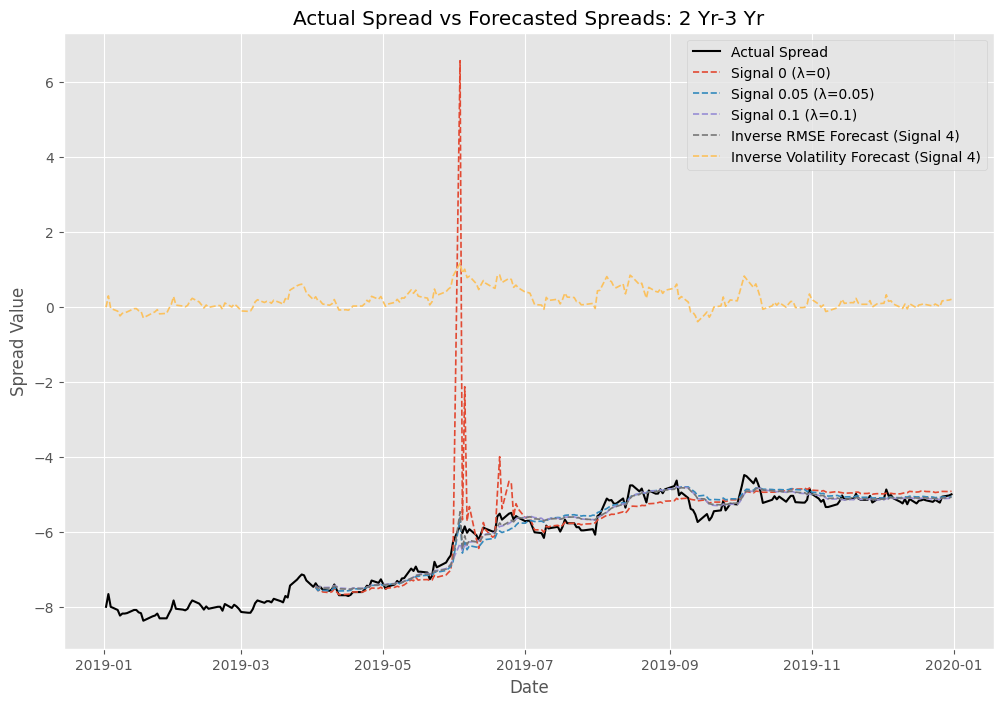

Plotting Testing Results for 3 Yr-5 Yr...


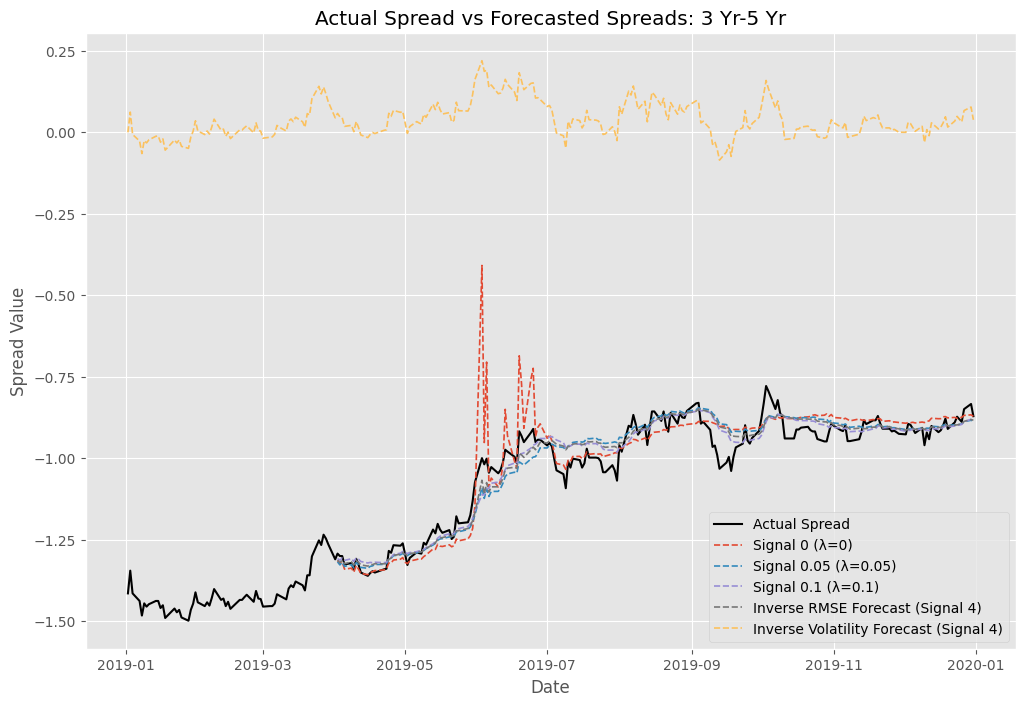

Plotting Testing Results for 7 Yr-10 Yr...


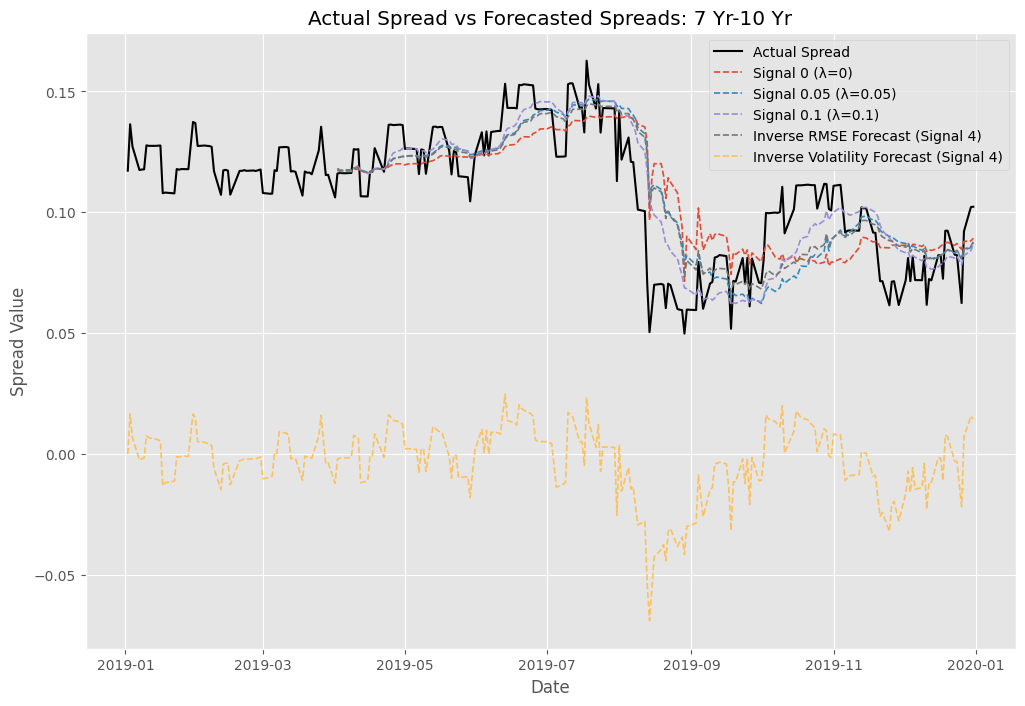

Plotting Testing Results for 5 Yr-7 Yr...


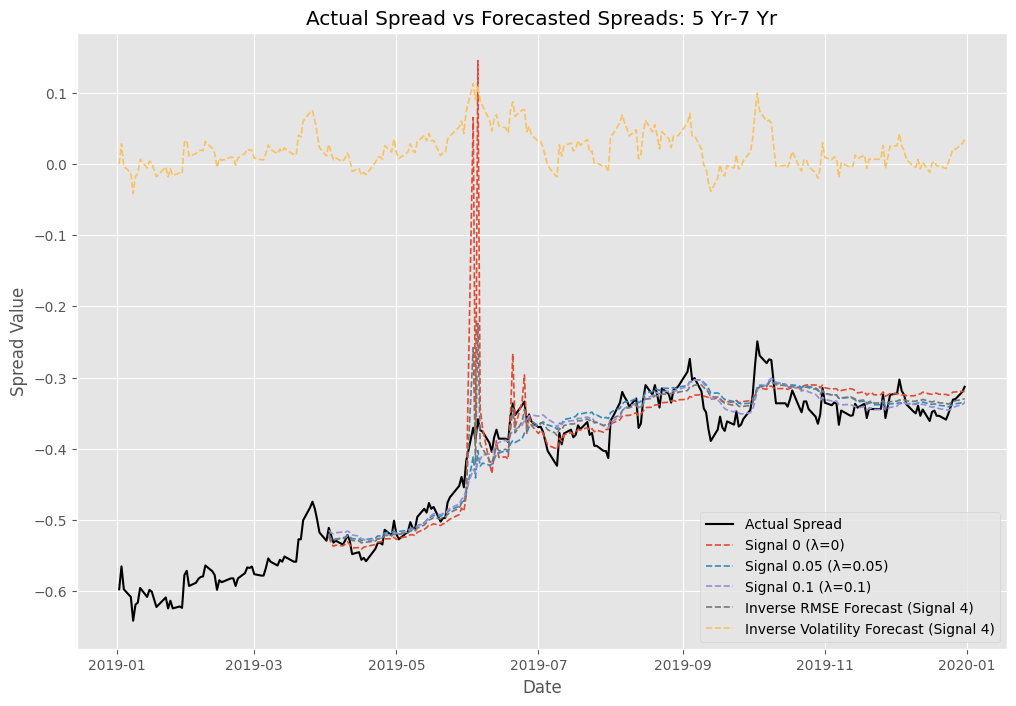

In [315]:
import matplotlib.pyplot as plt

# Function to plot Actual Spread vs Forecasted Spreads
def plot_testing_results(df, spread_name):
    """
    Plot Actual Spread vs Forecasted Spreads (Signals 1-4) for Testing Data.

    Args:
        df (pd.DataFrame): DataFrame containing actual and forecasted spreads.
        spread_name (str): Name of the spread for labeling purposes.
    """
    plt.figure(figsize=(12, 8))

    # Plot Actual Spread
    plt.plot(df['Spread'], label="Actual Spread", linewidth=1.5, color='black')

    # Plot Signals 1, 2, 3
    for lda in [0, 0.05, 0.1]:
        forecast_col = f'forecastedSpread_{lda}'
        if forecast_col in df.columns:
            plt.plot(df[forecast_col], label=f"Signal {lda} (λ={lda})", linestyle="--", linewidth=1.2)

    # Plot Signal 4 Variants
    signal4_options = {
        # 'fc_spread_PCA_Sig_4': "PCA-Based Forecast (Signal 4)",
        'fc_Spread_invRMSE': "Inverse RMSE Forecast (Signal 4)",
        'fc_Spread_WA_Sig_4': "Inverse Volatility Forecast (Signal 4)"
    }
    for col, label in signal4_options.items():
        if col in df.columns:
            plt.plot(df[col], label=label, linestyle="--", linewidth=1.2)

    # Formatting
    plt.title(f"Actual Spread vs Forecasted Spreads: {spread_name}")
    plt.xlabel("Date")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate Plots for All Spreads
for spread_name, df_test in df_dict_testing.items():
    print(f"Plotting Testing Results for {spread_name}...")
    plot_testing_results(df_test, spread_name)


### Observations and Insights

In the testing phase, we observe that the **Inverse Volatility Blended Signal** does not perform as reliably as it did during the training phase. Its poor fit in the testing data highlights a key limitation: volatility-based signals require continuous re-estimation, as volatility data is inherently short-term and subject to rapid changes. This aligns with the broader notion that volatility is a dynamic measure of uncertainty and may not generalize well over longer horizons without periodic recalibration.

Additionally, I have chosen to omit the **PCA-Based Signal** graphs in the last code cell due to significant instability observed in my implementation. The extreme errors and numerical inconsistencies in the PCA forecasts, as seen in the metrics, render it unsuitable for current analysis. These results suggest that further refinement or regularization of the PCA approach is necessary to produce stable and reliable outputs.

For this analysis, I have instead focused on the signals that have demonstrated consistent and reliable performance. Notably:

1. **Signal 0.1 (λ=0.1)** consistently emerges as the most robust signal across all spreads. It delivers the **lowest MSE**, **highest correlation**, and **strong signal-to-noise ratios (SNR)** in both training and testing phases, indicating its reliability in forecasting spread movements.  
2. **Inverse RMSE Blended Signal** also shows commendable performance, particularly in certain spreads (e.g., `3 Yr-5 Yr`), where it achieves competitive accuracy and SNR. While it does not outperform Signal 0.1 across all spreads, it remains a strong secondary candidate.

### Conclusion  
The results underscore the importance of choosing signals that balance **accuracy**, **stability**, and **generalizability** across both training and testing datasets. **Signal 0.1** stands out as the most dependable forecast, followed by the **Inverse RMSE Blended Signal**. Meanwhile, volatility-based signals and PCA-based methods require further attention, either through enhanced re-estimation frameworks (for volatility) or improved numerical stability (for PCA).
